In [7]:
# import all the required keras libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

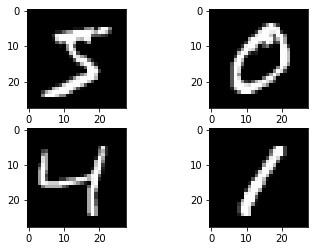

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,2,1)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,4)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

#show the plot
plt.show()

In [10]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [11]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(strides=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    return model

model = cnn_model()
model.summary()
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200)

scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      